In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10577.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4329.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10500.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.1494.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.6744.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.5740.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.12325.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.7652.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4223.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.7804.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4253.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.2314.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.7084.jpg
/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.8686.jpg
/kaggle/input/cat-or-dog-image-classification

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np

2024-05-15 17:40:54.762632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 17:40:54.762728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 17:40:54.851075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
DOG_TRAIN_PATH = "/kaggle/input/cat-or-dog-image-classification/Train/Dog"
CAT_TRAIN_PATH = "/kaggle/input/cat-or-dog-image-classification/Train/Cat"
DOG_TEST_PATH = "/kaggle/input/cat-or-dog-image-classification/Test/Dog"
CAT_TEST_PATH = "/kaggle/input/cat-or-dog-image-classification/Test/Cat"

In [4]:
import os 
DOG_TRAIN_PATH = "/kaggle/input/cat-or-dog-image-classification/Train/Dog"
CAT_TRAIN_PATH = "/kaggle/input/cat-or-dog-image-classification/Train/Cat"
DOG_TEST_PATH = "/kaggle/input/cat-or-dog-image-classification/Test/Dog"
CAT_TEST_PATH = "/kaggle/input/cat-or-dog-image-classification/Test/Cat"


print("\n Train paths")
print("Dog:",DOG_TRAIN_PATH)
print("Cat:",CAT_TRAIN_PATH)
print("\n Testing paths:")
print("Dog:",DOG_TEST_PATH)
print("Cat",CAT_TEST_PATH )


 Train paths
Dog: /kaggle/input/cat-or-dog-image-classification/Train/Dog
Cat: /kaggle/input/cat-or-dog-image-classification/Train/Cat

 Testing paths:
Dog: /kaggle/input/cat-or-dog-image-classification/Test/Dog
Cat /kaggle/input/cat-or-dog-image-classification/Test/Cat


In [5]:
print("\n Number of training images:")
print("Dog:",len(os.listdir(DOG_TRAIN_PATH)))
print("Cat:",len(os.listdir(CAT_TRAIN_PATH)))
print("\n Number of testing images:")
print("Dog:",len(os.listdir(DOG_TEST_PATH)))
print("Cat",len(os.listdir(CAT_TEST_PATH )))


 Number of training images:
Dog: 11827
Cat: 11823

 Number of testing images:
Dog: 1919
Cat 1944


In [6]:
from PIL import Image
import os
#function to get image shape
def get_image_shape_pil(directory):
 
    image_shapes = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".png")):
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                image_shapes.append(img.size)
    return image_shapes

# Example usage:
# CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'
cat_train_shapes = get_image_shape_pil(CAT_TRAIN_PATH)
print("Shapes of cat images in the training dataset:", cat_train_shapes)

Shapes of cat images in the training dataset: [(349, 352), (500, 333), (500, 332), (500, 374), (500, 374), (337, 270), (499, 423), (499, 302), (320, 239), (499, 375), (300, 280), (389, 499), (231, 270), (500, 426), (273, 324), (499, 333), (411, 435), (399, 352), (500, 374), (447, 499), (134, 126), (211, 252), (466, 381), (499, 375), (350, 261), (320, 426), (229, 306), (487, 499), (217, 200), (199, 200), (499, 307), (500, 369), (397, 430), (499, 375), (480, 359), (390, 332), (360, 479), (499, 333), (251, 180), (500, 458), (287, 183), (368, 500), (500, 373), (480, 354), (319, 209), (500, 374), (398, 499), (500, 374), (500, 374), (500, 374), (299, 225), (499, 375), (500, 374), (499, 375), (479, 360), (334, 500), (447, 455), (336, 410), (349, 318), (500, 452), (350, 232), (319, 240), (368, 359), (421, 499), (162, 145), (431, 353), (288, 215), (499, 333), (476, 480), (499, 375), (499, 349), (294, 201), (471, 499), (374, 500), (319, 240), (200, 199), (500, 374), (320, 239), (499, 451), (499,

In [7]:
import numpy as np

# Define the paths to the training data for cats and dogs
DOG_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Dog'
CAT_TRAIN_PATH = '/kaggle/input/cat-or-dog-image-classification/Train/Cat'

# Function to get file paths and labels from a directory
def get_files_and_labels(directory, label):
    file_paths = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_paths.append(os.path.join(directory, filename))
            labels.append(label)  # Assign label for each image
    return file_paths, labels

# Get file paths and labels for training data
dog_train_paths, dog_train_labels = get_files_and_labels(DOG_TRAIN_PATH, 1)  # Assign label 1 for dog
cat_train_paths, cat_train_labels = get_files_and_labels(CAT_TRAIN_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
train_paths = dog_train_paths + cat_train_paths
train_labels = dog_train_labels + cat_train_labels

# Convert lists to numpy arrays
train_paths = np.array(train_paths)
train_labels = np.array(train_labels)

# Shuffle the data (if needed)
random_indices = np.random.permutation(len(train_paths))
train_paths = train_paths[random_indices]
train_labels = train_labels[random_indices]

# Check the combined dataset size
print("Combined Training Data Size:", len(train_paths))

Combined Training Data Size: 23650


In [8]:
for i in range(10):
    print("Path:", train_paths[i], "Label:", train_labels[i])

Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.8776.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.5749.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.5269.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.3840.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.3903.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.11261.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.4020.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Cat/cat.9309.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.11857.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Train/Dog/dog.6244.jpg Label: 1


In [9]:
# Define the paths to the testing data for cats and dogs
DOG_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Dog'
CAT_TEST_PATH = '/kaggle/input/cat-or-dog-image-classification/Test/Cat'

# Get file paths and labels for testing data
dog_test_paths, dog_test_labels = get_files_and_labels(DOG_TEST_PATH, 1)  # Assign label 1 for dog
cat_test_paths, cat_test_labels = get_files_and_labels(CAT_TEST_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
test_paths = dog_test_paths + cat_test_paths
test_labels = dog_test_labels + cat_test_labels

# Convert lists to numpy arrays
test_paths = np.array(test_paths)
test_labels = np.array(test_labels)

# Shuffle the data (if needed)
random_indices = np.random.permutation(len(test_paths))
test_paths = test_paths[random_indices]
test_labels = test_labels[random_indices]

# Check the combined dataset size
print("Combined Testing Data Size:", len(test_paths))

# Print the first 10 paths and their corresponding labels from the combined testing dataset
for i in range(10):
    print("Path:", test_paths[i], "Label:", test_labels[i])

Combined Testing Data Size: 3863
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4567.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4525.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4479.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4621.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Cat/cat.4577.jpg Label: 0
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.11758.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4047.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.615.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.6767.jpg Label: 1
Path: /kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.4172.jpg Label: 1


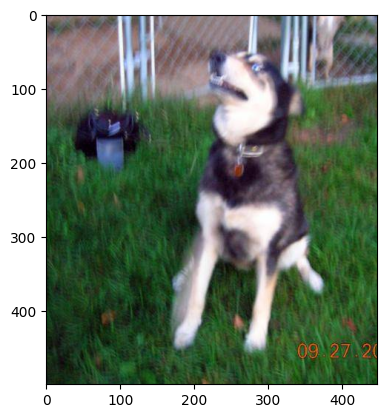

In [10]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
id_train = random.randint(0,len(train_paths))
img = mpimg.imread(train_paths[id_train])
# img = mpimg.imread('/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10661.jpg')
imgplt = plt.imshow(img)
# plt.imshow()

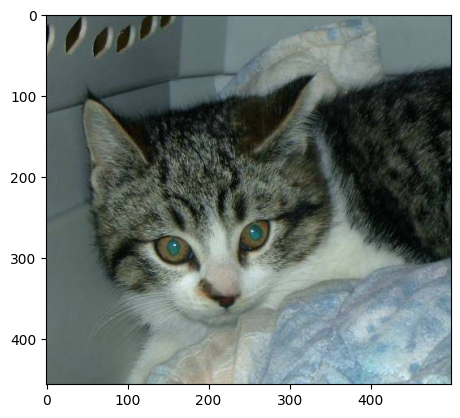

In [11]:
id_train = random.randint(0,len(test_paths))
img = mpimg.imread(test_paths[id_train])
imgplt = plt.imshow(img)

In [12]:
import tensorflow as tf

def preprocess_and_resize_images(image_paths, labels, target_size):
    """
    Preprocesses and resizes a batch of images.

    Args:
    - image_paths: List of file paths to the images.
    - labels: List of labels corresponding to the images.
    - target_size: Tuple specifying the target size for the images (height, width).

    Returns:
    - A tuple containing preprocessed and resized images and their labels.
    """
    images = []
    for path in image_paths:
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)  # Decode JPEG image with 3 channels (RGB)
        img = tf.image.resize(img, target_size)
        images.append(img)
    images = tf.stack(images)
    return images.numpy(), labels

# Define the target size for resizing
target_size = (150, 150)

# Preprocess and resize the images in the combined testing dataset
train_images_resized,train_labels_resized = preprocess_and_resize_images(train_paths, train_labels, target_size)
test_images_resized, test_labels_resized = preprocess_and_resize_images(test_paths, test_labels, target_size)

In [13]:
# Check the shape of the resized images array


train_labels = train_labels.reshape(len(train_labels),1)
test_labels = test_labels.reshape(len(test_labels),1)
                                   
print("Resized Train Images Shape:", train_images_resized.shape)
print("train label:", train_labels.shape)
print("Resized Test Images Shape:", test_images_resized.shape)
print("Train label Shape:", test_labels.shape)

Resized Train Images Shape: (23650, 150, 150, 3)
train label: (23650, 1)
Resized Test Images Shape: (3863, 150, 150, 3)
Train label Shape: (3863, 1)


In [14]:
train_images_resized[1,:]

array([[[127.78889   , 140.7889    , 131.62222   ],
        [130.        , 142.        , 132.        ],
        [129.95555   , 141.12222   , 127.45556   ],
        ...,
        [ 11.168836  ,   8.002179  ,   4.042161  ],
        [ 30.413334  ,  24.913334  ,  23.293333  ],
        [ 53.28433   ,  50.28433   ,  34.52874   ]],

       [[129.40668   , 142.40668   , 133.24      ],
        [132.24      , 144.24      , 134.24      ],
        [130.37334   , 141.54001   , 127.87334   ],
        ...,
        [ 15.020033  ,  13.020033  ,   2.9600098 ],
        [  9.280001  ,   4.9       ,   0.24000001],
        [ 15.146543  ,  12.906543  ,   3.7999072 ]],

       [[131.73334   , 144.73334   , 135.56667   ],
        [134.23334   , 146.23334   , 136.23334   ],
        [134.9       , 146.06667   , 132.4       ],
        ...,
        [ 53.733356  ,  52.733356  ,  32.000023  ],
        [ 42.9       ,  40.26667   ,  22.06667   ],
        [ 20.611246  ,  19.077913  ,  14.811247  ]],

       ...,

      

In [15]:
train_images_resized = train_images_resized/255
test_images_resized = test_images_resized/255

In [16]:
model  = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [18]:
model.fit(train_images_resized,train_labels,epochs = 10,batch_size = 64)

Epoch 1/10
  5/370 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4650 - loss: 1.1041 

I0000 00:00:1715795070.122887      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715795070.140556      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


370/370 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6016 - loss: 0.6899
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7298 - loss: 0.5399
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8001 - loss: 0.4305
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8549 - loss: 0.3319
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9104 - loss: 0.2228
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9604 - loss: 0.1147
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9823 - loss: 0.0581
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9930 - loss: 0.0262
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9963 - loss: 0.0157
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9948 - loss: 0.0197


In [19]:
model.fit(train_images_resized,train_labels,epochs = 1,batch_size = 64)

370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9970 - loss: 0.0120


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
[[0.7479672]]
dog


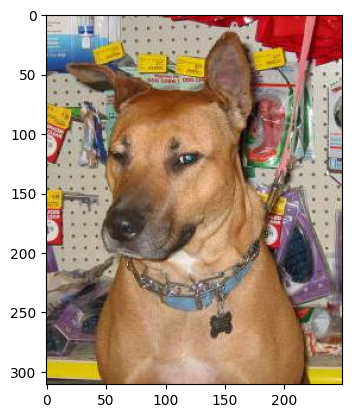

In [20]:
id_predict = random.randint(0,len(test_paths))
 
img = mpimg.imread(test_paths[id_predict])
# img = mpimg.imread('/kaggle/input/cat-or-dog-image-classification/Test/Dog/dog.10661.jpg')
imgplt = plt.imshow(img)
y_pred = model.predict(test_images_resized[id_predict].reshape(1,150,150,3))
print(y_pred)
output = "dog" if y_pred >0.5 else "cat"
print(output)

In [21]:
model.save('simple_cnn_cat_dog1.h5')